In [2]:
# Bibliotecas que usaremos para Análise de Dados (fonte: Vídeos sobre o assunto no youtube)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas que usaremos para Machine Learning (fonte: Vídeos sobre o assunto no youtube)

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Algumas fontes usadas:
# https://youtu.be/7yJxIAOurxw
# https://www.youtube.com/watch?v=YsEXnV_k83A

In [4]:
stats = pd.read_csv('Data/campeonatos_futebol_atualizacao.csv') # Aqui carrega nossos Dados para serem usados
stats.head() #Função que mostra as 5 primeiras linhas do banco de dados

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,...,NaN,NaN,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,...,NaN,NaN,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,...,NaN,NaN,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,...,NaN,NaN,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,...,NaN,NaN,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1


In [5]:
stats.shape #verificar as dimensoes do dataframe

(27716, 40)

In [6]:
stats.info() # vendo o formato dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27716 entries, 0 to 27715
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chutes a gol 1       26204 non-null  float64
 1   Chutes a gol 2       26204 non-null  float64
 2   Impedimentos 1       24942 non-null  float64
 3   Impedimentos 2       24942 non-null  float64
 4   Escanteios 1         25388 non-null  float64
 5   Escanteios 2         25388 non-null  float64
 6   Chutes fora 1        25392 non-null  float64
 7   Chutes fora 2        25392 non-null  float64
 8   Faltas 1             25394 non-null  float64
 9   Faltas 2             25394 non-null  float64
 10  Cartões amarelos 1   27716 non-null  float64
 11  Cartões amarelos 2   27716 non-null  float64
 12  Cartões vermelhos 1  27716 non-null  float64
 13  Cartões vermelhos 2  27716 non-null  float64
 14  Cruzamentos 1        9015 non-null   float64
 15  Cruzamentos 2        9015 non-null  

In [7]:
nulos_por_coluna = stats.isna().sum() # verificar se possui nulos (feito na primeira call em grupo)
print(f"Numéros de valores nulos: \n{nulos_por_coluna}")

Numéros de valores nulos: 
Chutes a gol 1          1512
Chutes a gol 2          1512
Impedimentos 1          2774
Impedimentos 2          2774
Escanteios 1            2328
Escanteios 2            2328
Chutes fora 1           2324
Chutes fora 2           2324
Faltas 1                2322
Faltas 2                2322
Cartões amarelos 1         0
Cartões amarelos 2         0
Cartões vermelhos 1        0
Cartões vermelhos 2        0
Cruzamentos 1          18701
Cruzamentos 2          18701
Laterais 1             12549
Laterais 2             12549
Chutes bloqueados 1    18873
Chutes bloqueados 2    18873
Contra-ataques 1       21453
Contra-ataques 2       21453
Gols 1                     0
Gols 2                     0
Tiro de meta 1         15701
Tiro de meta 2         15701
Tratamentos 1          22697
Tratamentos 2          22697
Substituições 1        18296
Substituições 2        18296
Tiros-livres 1         21470
Tiros-livres 2         21470
Defesas difíceis 1     21520
Defesas difíceis

In [8]:
print(stats[['Chutes bloqueados 1', 'Chutes bloqueados 2']].mean()) # Verificação dos chutes bloqueados (também feito na call)

Chutes bloqueados 1    2.438313
Chutes bloqueados 2    1.930001
dtype: float64


In [9]:
# Tirando as linhas nulas das categorias que possuem poucos valores nulos nelas
# Como a categoria 2 possue o mesmo numero de nulos eu considerei que sao as mesmas partidas

cols_verificar = ['Chutes a gol 1', 'Impedimentos 1', 'Escanteios 1', 'Chutes fora 1', 'Faltas 1', 'Posse 1(%)', 'Position 1', 'Position 2']
stats_sem_nulos = stats.dropna(subset=cols_verificar)


stats_sem_nulos

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,...,NaN,NaN,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,...,NaN,NaN,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,...,NaN,NaN,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,...,NaN,NaN,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,...,NaN,NaN,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27710,5.0,6.0,4.0,3.0,3.0,6.0,2.0,3.0,16.0,16.0,...,NaN,NaN,NaN,NaN,41.0,59.0,Bolton,Birmingham,4-4-2,4-4-2
27711,6.0,2.0,1.0,0.0,9.0,6.0,6.0,5.0,7.0,7.0,...,NaN,NaN,NaN,NaN,52.0,48.0,Aston Villa,Blackburn,4-4-2,4-5-1
27712,6.0,0.0,4.0,3.0,4.0,2.0,8.0,2.0,11.0,9.0,...,NaN,NaN,NaN,NaN,52.0,48.0,Arsenal,Fulham,4-2-3-1,4-4-2
27713,7.0,7.0,2.0,3.0,10.0,2.0,8.0,0.0,10.0,6.0,...,NaN,NaN,NaN,NaN,55.0,45.0,Manchester Utd,Stoke,4-4-2,4-4-2


In [10]:
# Aqui é retirado as colunas que tenham menos que 15 mil valores não nulos
stats_sem_nulos = stats_sem_nulos.dropna(axis= 1, thresh=15000) 
stats_sem_nulos

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Cartões vermelhos 1,Cartões vermelhos 2,Gols 1,Gols 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,...,0.0,0.0,3.0,0.0,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,...,0.0,0.0,0.0,0.0,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,...,1.0,0.0,2.0,2.0,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,...,0.0,0.0,2.0,1.0,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,...,0.0,0.0,2.0,0.0,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27710,5.0,6.0,4.0,3.0,3.0,6.0,2.0,3.0,16.0,16.0,...,0.0,0.0,2.0,1.0,41.0,59.0,Bolton,Birmingham,4-4-2,4-4-2
27711,6.0,2.0,1.0,0.0,9.0,6.0,6.0,5.0,7.0,7.0,...,0.0,0.0,0.0,1.0,52.0,48.0,Aston Villa,Blackburn,4-4-2,4-5-1
27712,6.0,0.0,4.0,3.0,4.0,2.0,8.0,2.0,11.0,9.0,...,0.0,0.0,4.0,0.0,52.0,48.0,Arsenal,Fulham,4-2-3-1,4-4-2
27713,7.0,7.0,2.0,3.0,10.0,2.0,8.0,0.0,10.0,6.0,...,0.0,0.0,4.0,0.0,55.0,45.0,Manchester Utd,Stoke,4-4-2,4-4-2


<AxesSubplot:>

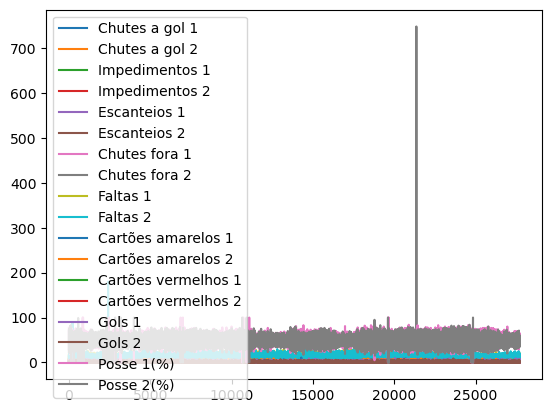

In [11]:
# Tentando identificar outliers aqui
# É um pouco difícil de ver, mas dá para notar alguns dados bem discrepantes
stats_sem_nulos.plot()

<AxesSubplot:>

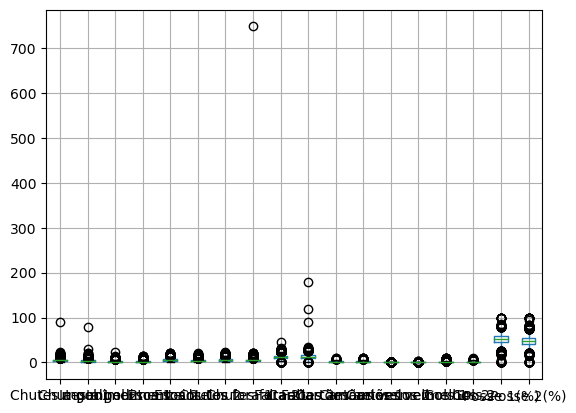

In [12]:
# Outra forma de ver
stats_sem_nulos.boxplot()

In [13]:
# Para facilitar a leitura do boxplot
stats_sem_nulos.columns

Index(['Chutes a gol 1', 'Chutes a gol 2', 'Impedimentos 1', 'Impedimentos 2',
       'Escanteios 1', 'Escanteios 2', 'Chutes fora 1', 'Chutes fora 2',
       'Faltas 1', 'Faltas 2', 'Cartões amarelos 1', 'Cartões amarelos 2',
       'Cartões vermelhos 1', 'Cartões vermelhos 2', 'Gols 1', 'Gols 2',
       'Posse 1(%)', 'Posse 2(%)', 'Time 1', 'Time 2', 'Position 1',
       'Position 2'],
      dtype='object')

<AxesSubplot:>

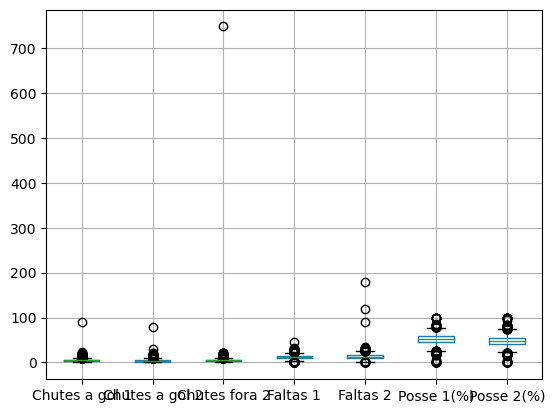

In [14]:
# Visualizando os mais discrepantes
stats_sem_nulos[['Chutes a gol 1','Chutes a gol 2', 'Chutes fora 2', 'Faltas 1', 'Faltas 2', 'Posse 1(%)', 'Posse 2(%)']].boxplot()

In [15]:
# Dá pra perceber que as variáveis anteriores realmente possuem outliers
stats_sem_nulos.max()

Chutes a gol 1           90.0
Chutes a gol 2           80.0
Impedimentos 1           23.0
Impedimentos 2           15.0
Escanteios 1             22.0
Escanteios 2             21.0
Chutes fora 1            23.0
Chutes fora 2           748.0
Faltas 1                 46.0
Faltas 2                180.0
Cartões amarelos 1       11.0
Cartões amarelos 2        9.0
Cartões vermelhos 1       2.0
Cartões vermelhos 2       4.0
Gols 1                   10.0
Gols 2                    9.0
Posse 1(%)              100.0
Posse 2(%)              100.0
Time 1                 Zwolle
Time 2                 Zwolle
Position 1              5-4-1
Position 2              5-4-1
dtype: object

In [16]:
# Lembrando que não há valores negativos
stats_sem_nulos.min()

Chutes a gol 1                0.0
Chutes a gol 2                0.0
Impedimentos 1                0.0
Impedimentos 2                0.0
Escanteios 1                  0.0
Escanteios 2                  0.0
Chutes fora 1                 0.0
Chutes fora 2                 0.0
Faltas 1                      0.0
Faltas 2                      0.0
Cartões amarelos 1            0.0
Cartões amarelos 2            0.0
Cartões vermelhos 1           0.0
Cartões vermelhos 2           0.0
Gols 1                        0.0
Gols 2                        0.0
Posse 1(%)                    0.0
Posse 2(%)                    0.0
Time 1                 AEK Atenas
Time 2                 AEK Atenas
Position 1              3-1-3-1-2
Position 2              3-1-3-1-2
dtype: object

<AxesSubplot:>

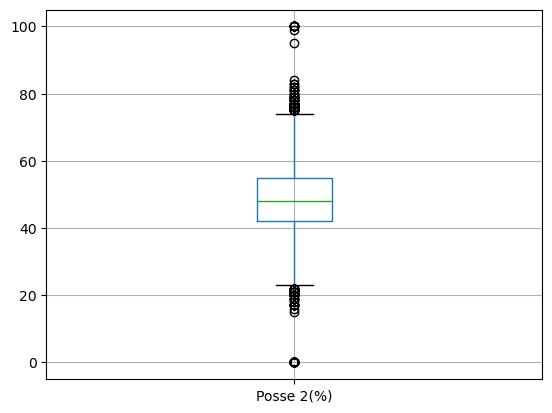

In [17]:
#'Chutes a gol 1'(0),'Chutes a gol 2'(1),'Chutes fora 2'(7), 'Faltas 1'(8), 'Faltas 2'(9), 'Posse 1(%)'(16), 'Posse 2(%)'(17)'
# Olhando mais de perto
stats_sem_nulos[[stats_sem_nulos.columns[17]]].boxplot()

In [18]:
bool_filtro = (stats_sem_nulos['Chutes a gol 1']<=30) & (stats_sem_nulos['Chutes a gol 2']<=30) & (stats_sem_nulos['Chutes fora 2']<30) & (stats_sem_nulos['Faltas 1']<40) & (stats_sem_nulos['Faltas 2']<40) & (stats_sem_nulos['Posse 1(%)']<100) & (stats_sem_nulos['Posse 2(%)']<100)

In [19]:
stats_sem_nulos = stats_sem_nulos[bool_filtro]

In [20]:
stats_sem_nulos.max()

Chutes a gol 1           23.0
Chutes a gol 2           30.0
Impedimentos 1           23.0
Impedimentos 2           15.0
Escanteios 1             22.0
Escanteios 2             21.0
Chutes fora 1            23.0
Chutes fora 2            21.0
Faltas 1                 32.0
Faltas 2                 35.0
Cartões amarelos 1       11.0
Cartões amarelos 2        9.0
Cartões vermelhos 1       2.0
Cartões vermelhos 2       4.0
Gols 1                   10.0
Gols 2                    9.0
Posse 1(%)               85.0
Posse 2(%)               99.0
Time 1                 Zwolle
Time 2                 Zwolle
Position 1              5-4-1
Position 2              5-4-1
dtype: object

<AxesSubplot:>

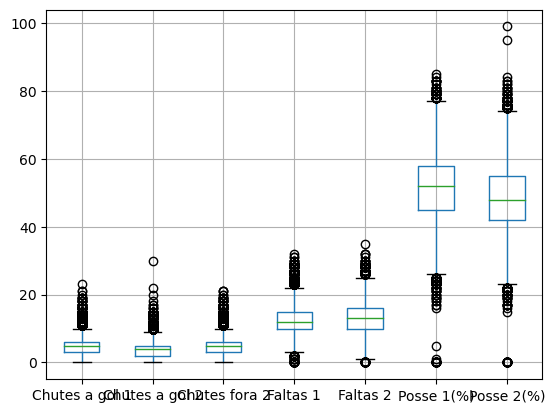

In [21]:
stats_sem_nulos[['Chutes a gol 1','Chutes a gol 2','Chutes fora 2', 'Faltas 1', 'Faltas 2', 'Posse 1(%)', 'Posse 2(%)']].boxplot()

In [22]:
# Nesta função, está sendo criada uma coluna "Resultado", que afirma se o time mandante ganhou (1), empatou (0) ou perdeu (-1)
stats_sem_nulos['Resultado'] = np.where(stats_sem_nulos['Gols 1'] > stats_sem_nulos['Gols 2'], 1, 
                          np.where(stats_sem_nulos['Gols 1'] < stats_sem_nulos['Gols 2'], -1, 0))

stats_sem_nulos['Resultado'].head()

C:\Users\arthu\AppData\Local\Temp\ipykernel_13000\1592084058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_sem_nulos['Resultado'] = np.where(stats_sem_nulos['Gols 1'] > stats_sem_nulos['Gols 2'], 1,


0    1
1    0
2    0
3    1
4    1
Name: Resultado, dtype: int32

In [23]:
stats_sem_nulos.shape # tamanho do nosso dataFrame após a remoção de valores nulos

(23420, 23)

In [24]:
stats_sem_nulos.info() # Aqui precisa ver se iremos alterar algum formato de alguma variavel

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23420 entries, 0 to 27714
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chutes a gol 1       23420 non-null  float64
 1   Chutes a gol 2       23420 non-null  float64
 2   Impedimentos 1       23420 non-null  float64
 3   Impedimentos 2       23420 non-null  float64
 4   Escanteios 1         23420 non-null  float64
 5   Escanteios 2         23420 non-null  float64
 6   Chutes fora 1        23420 non-null  float64
 7   Chutes fora 2        23420 non-null  float64
 8   Faltas 1             23420 non-null  float64
 9   Faltas 2             23420 non-null  float64
 10  Cartões amarelos 1   23420 non-null  float64
 11  Cartões amarelos 2   23420 non-null  float64
 12  Cartões vermelhos 1  23420 non-null  float64
 13  Cartões vermelhos 2  23420 non-null  float64
 14  Gols 1               23420 non-null  float64
 15  Gols 2               23420 non-null 

In [25]:
nulos_por_coluna = stats_sem_nulos.isna().sum() # Confirmando que nosso dataFrame nao possui valores nulos
print(f"Numéros de valores nulos: \n{nulos_por_coluna}")

Numéros de valores nulos: 
Chutes a gol 1         0
Chutes a gol 2         0
Impedimentos 1         0
Impedimentos 2         0
Escanteios 1           0
Escanteios 2           0
Chutes fora 1          0
Chutes fora 2          0
Faltas 1               0
Faltas 2               0
Cartões amarelos 1     0
Cartões amarelos 2     0
Cartões vermelhos 1    0
Cartões vermelhos 2    0
Gols 1                 0
Gols 2                 0
Posse 1(%)             0
Posse 2(%)             0
Time 1                 0
Time 2                 0
Position 1             0
Position 2             0
Resultado              0
dtype: int64


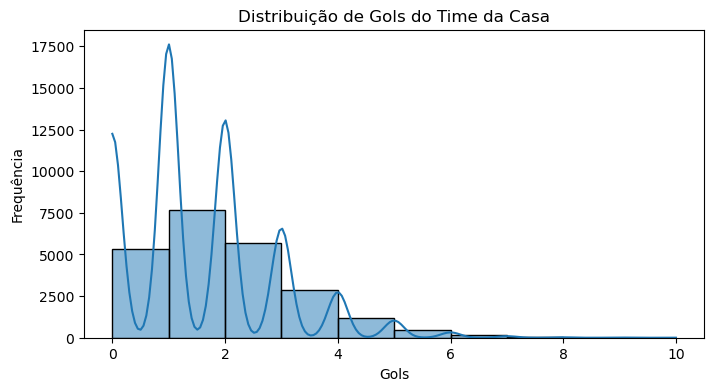

In [26]:
# Histograma de gols do time da casa
plt.figure(figsize=(8, 4))
sns.histplot(data=stats_sem_nulos, x='Gols 1', bins=10, kde=True)  # 'kde' adiciona uma linha de densidade
plt.title("Distribuição de Gols do Time da Casa")
plt.xlabel("Gols")
plt.ylabel("Frequência")
plt.show()

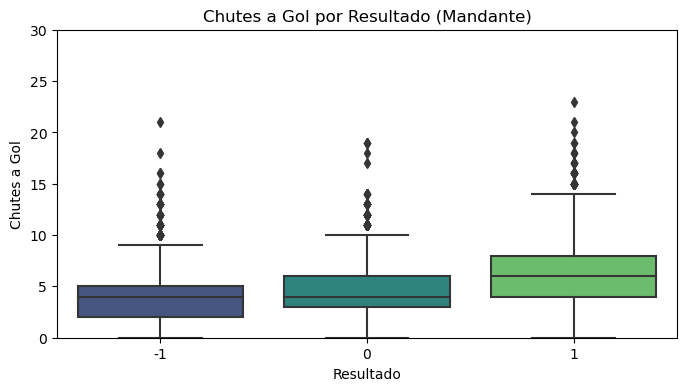

In [27]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=stats_sem_nulos, x='Resultado', y='Chutes a gol 1', palette="viridis")  
plt.title("Chutes a Gol por Resultado (Mandante)")
plt.xlabel("Resultado")
plt.ylabel("Chutes a Gol")
plt.ylim(0, 30)
plt.show()
# Neste grafíco é possível confirmar que as partidas ganhas teve uma média no número de chutes ao gol maior que na derrota/empate

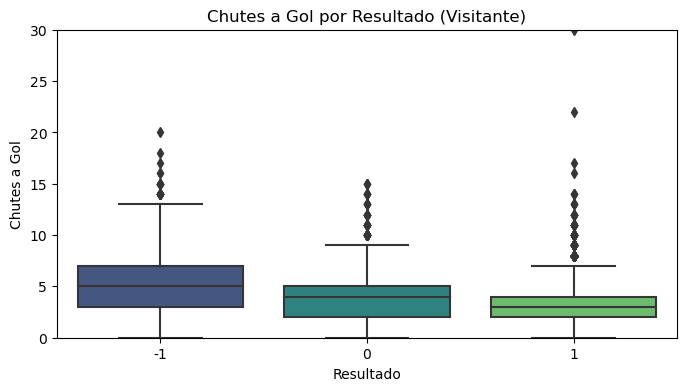

In [28]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=stats_sem_nulos, x='Resultado', y='Chutes a gol 2', palette="viridis")  
plt.title("Chutes a Gol por Resultado (Visitante)")
plt.xlabel("Resultado")
plt.ylabel("Chutes a Gol")
plt.ylim(0, 30)
plt.show()
# No caso do time visitante temos que (-1) é nossa vitória e (1) nossa derrota

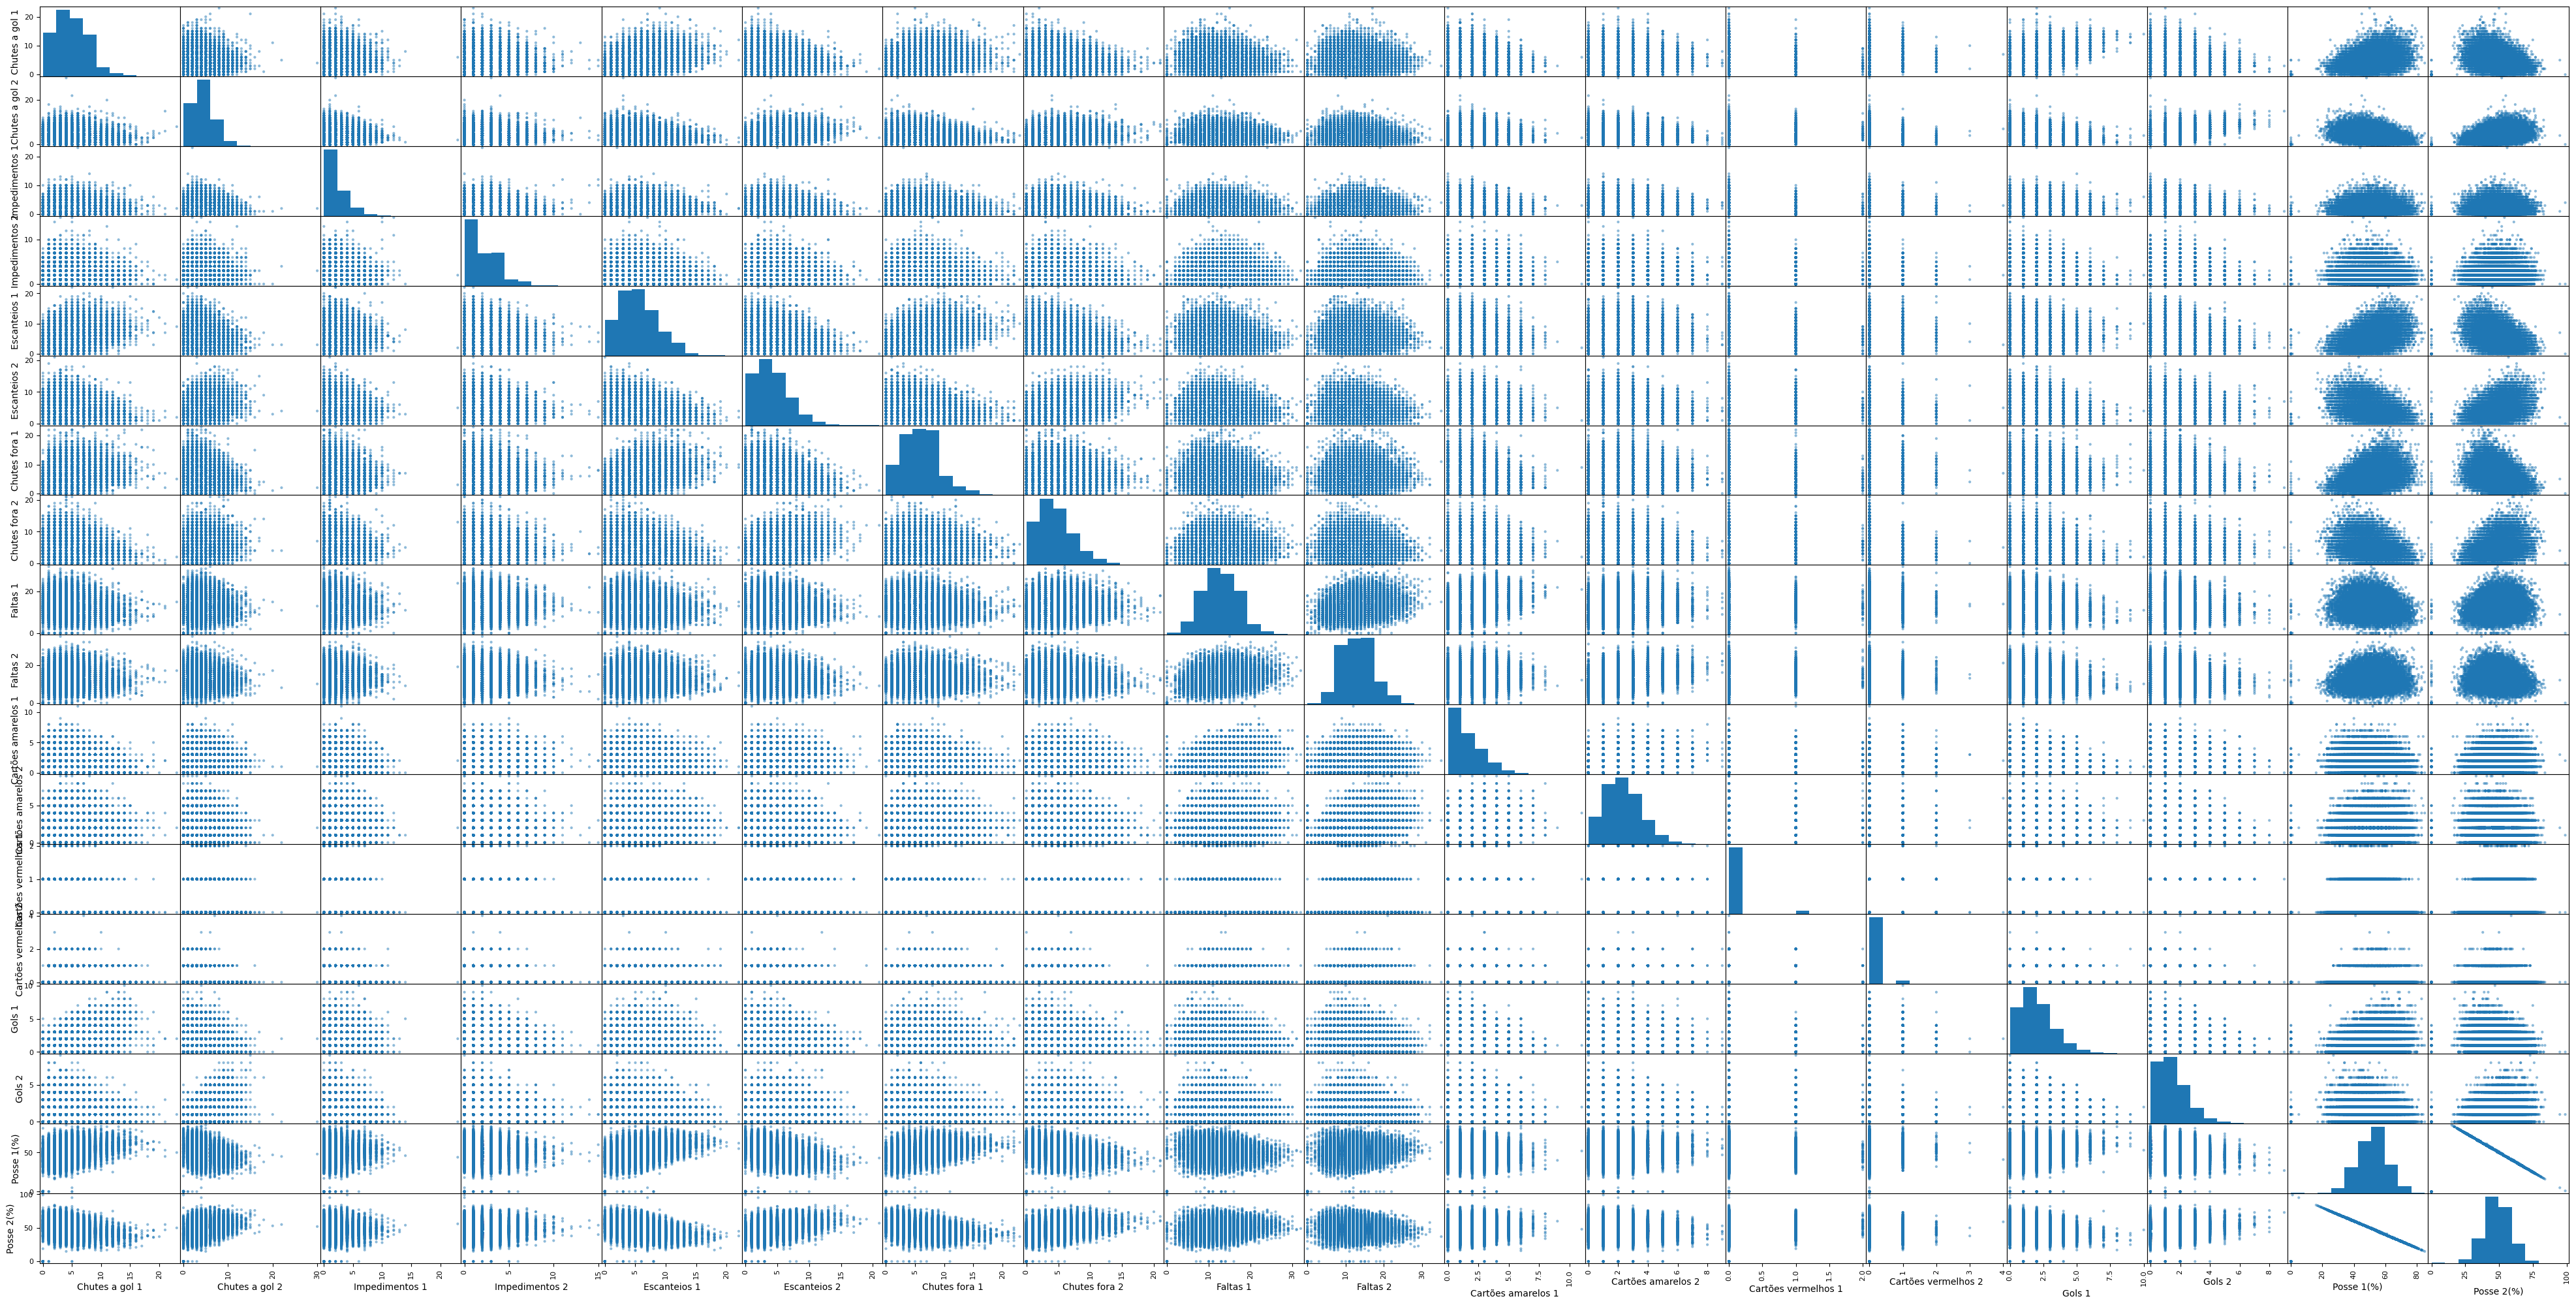

In [29]:
stats_numericos = stats_sem_nulos.select_dtypes(include=['int64', 'float64'])
pd.plotting.scatter_matrix(stats_numericos, figsize=(50, 25))
plt.show()

# Este gráfico mostra a relação entre cada par de variável do nosso dataframe, ficou meio ruim de ver mas da pra chegar em algumas conclusões como falta de padrão e relação entre variáveis
# Além de confirmar coisas já conhecidas do senso comum, como quanto mais posse de bola um time possui, menos posse o outro time tem.

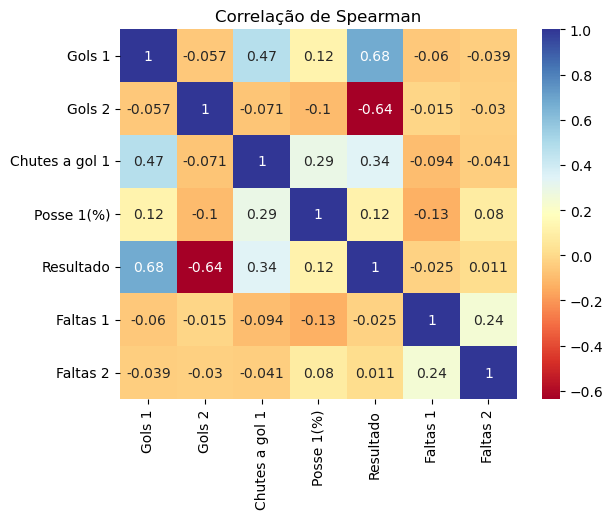

In [30]:
cols_correlacao = ['Gols 1', 'Gols 2', 'Chutes a gol 1', 'Posse 1(%)', 'Resultado', 'Faltas 1', 'Faltas 2']
df_corr = stats_sem_nulos[cols_correlacao]

# Calcule Kendall (exemplo)
corr_kendall = df_corr.corr(method='spearman')
sns.heatmap(corr_kendall, annot=True, cmap='RdYlBu')
plt.title("Correlação de Spearman")
plt.show()

# Neste caso, confirma algo bem óbvio que os gols tem grande correlação com o resultado, então não usaremos no nosso treinamento de machine learning

In [37]:
# Treinamento de Machine Learning

# Feito o tratamento de dados, nós podemos começar a fazer o treinamento do machine learning
## A gente vai precisar dividir os dados para treinamento e para teste

# Aqui há um problema que os modelos de regressão que usaremos não permitem strings, então irei tirar os nomes e a posição
# caso a acuracia não seja ideal, podemos definir como podemos adicionar elas para melhorar o resultado

X = stats_sem_nulos.drop(columns=['Resultado', 'Gols 1', 'Gols 2', 'Time 1', 'Time 2', 'Position 1', 'Position 2']) 
Y = stats_sem_nulos.Resultado # aqui ta a colunas que ele vai comparar pra ver se acertou

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.20, random_state = 42)  #separando 20% para o teste



In [41]:
# Aqui está acontecendo a normalização dos dados
scaler = MinMaxScaler() 
X_treino_norma = scaler.fit_transform(X_treino)
X_teste_norma = scaler.transform(X_teste)


In [44]:
# Aqui está o primeiro treinamento de Machine Learning, utilizando REGRESSÃO LINEAR
LR = LogisticRegression(random_state=0)
LR.fit(X_treino_norma, Y_treino)

LR.score(X_teste_norma, Y_teste)

0.5804867634500427

In [47]:
# Aqui está sendo usado o método de Árvore de Regressão para o machine learning

DT = DecisionTreeClassifier(random_state=0)
DT.fit(X_treino_norma, Y_treino) 

DT.score(X_teste_norma, Y_teste)

0.4594363791631085